# EXP 2a: MOTOR heritability subtype

##### Subtype:

- Niak preprocessed MOTOR task (new scrub method)
- BASC partition scale 135
- Connectome maps from:
```
opt_csv.labels_x = { 'MOT_FACE_L' , 'MOT_FACE_R' , 'MOT_HAND_L','MOT_HAND_R' , 'MOT_LEG_L','MOT_LEG_R'};
opt_csv.labels_y = { 'index' };
tab = [10;61;32;35;73;15];
```
- 5 subtype
- **Only age regressed out befor building subtypes**

##### Heritability:
- Regress "FD_scrubbed" "Gender" as covariate

## Build Pheno file

### Merge behavioral variables with subtypes weights

In [1]:
# Import pandas
import os
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
# Set up the paths to the files we want to work with
base_path = "/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_CovFD_MOTOR_RL_12-Dec-2016/networks/"
sbt_name_pattern = "sbt_weights_net_{}.csv"
pheno_path = '/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/pheno/'
out_path = '/home/yassinebha/Drive/HCP/Solar_heritability/HCP_subtype/'
solar_script = 'fcd_solar_h2r.sh'
pheno_save = 'solar_motor_RL_pheno.csv'
pedig_save = 'solar_motor_RL_pedigre.csv'
solar_out = 'subtype_5_net6_motor_CovAge_EXP2a'
solar_cov = '    cov FD_scrubbed Gender'

In [3]:
# List of network names
net_names = os.listdir(base_path)
net_names

['MOT_HAND_R',
 'MOT_LEG_R',
 'MOT_LEG_L',
 'MOT_FACE_R',
 'MOT_HAND_L',
 'MOT_FACE_L']

In [4]:
# Loop over each network and build weight file
for index, net in enumerate(net_names):
    file_path = os.path.join(base_path, net, sbt_name_pattern.format(net))
    if not os.path.exists(file_path):
        print("Hello, {} does not exist".format(file_path))
    
    tmp_weights = pd.read_csv(file_path)
    # Rename first column
    tmp_weights.rename(columns={" ":"Subject"}, inplace=True)
    tmp_weights.Subject = tmp_weights.Subject.str.strip(" ")
    
    rename_dict = dict()
    for colname in tmp_weights.columns:
        if colname == "Subject":
            continue
        else:
            new_name = "{}_{}".format(net, colname)
            # Get rid of trailing whitespace
            new_name = new_name.strip(" ")
            rename_dict[colname] = new_name

    tmp_weights.rename(columns=rename_dict, inplace=True)
    
    if index==0:
        dataframe = tmp_weights
    else:
        dataframe = pd.merge(dataframe, tmp_weights, on="Subject", how="inner")

In [5]:
dataframe.head()

,Subject,MOT_HAND_R_sub1,MOT_HAND_R_sub2,MOT_HAND_R_sub3,MOT_HAND_R_sub4,MOT_HAND_R_sub5,MOT_LEG_R_sub1,MOT_LEG_R_sub2,MOT_LEG_R_sub3,MOT_LEG_R_sub4,...,MOT_HAND_L_sub1,MOT_HAND_L_sub2,MOT_HAND_L_sub3,MOT_HAND_L_sub4,MOT_HAND_L_sub5,MOT_FACE_L_sub1,MOT_FACE_L_sub2,MOT_FACE_L_sub3,MOT_FACE_L_sub4,MOT_FACE_L_sub5
0,HCP100206,0.282,0.018,-0.217,0.135,-0.144,-0.051,0.060,0.181,-0.047,...,0.017,-0.108,0.241,-0.061,-0.098,0.297,-0.264,-0.091,-0.005,0.037
1,HCP100307,0.088,-0.114,0.119,-0.020,-0.100,-0.132,0.051,0.053,0.126,...,0.206,-0.100,-0.012,-0.110,0.111,-0.001,-0.006,0.149,0.121,-0.232
2,HCP100408,-0.061,0.229,0.230,-0.288,-0.066,-0.142,0.092,0.221,-0.052,...,-0.303,-0.177,-0.277,0.228,0.294,0.451,-0.434,-0.051,-0.166,0.198
3,HCP100610,-0.045,-0.281,-0.106,0.217,0.126,0.003,-0.111,-0.189,0.026,...,-0.191,0.228,0.092,-0.124,0.004,0.092,-0.027,-0.004,-0.326,0.314
4,HCP101006,-0.202,0.195,-0.008,-0.013,0.050,0.195,-0.265,-0.137,-0.121,...,-0.136,-0.254,-0.200,0.284,0.106,-0.296,0.347,0.229,-0.132,-0.045


In [6]:
dataframe.Subject.describe()

count           831
unique          831
top       HCP849264
freq              1
Name: Subject, dtype: object

In [7]:
# Load pheno file
file_weight = dataframe
file_pheno = pd.read_csv(os.path.join(pheno_path,"motor_RL_pheno_scrub_raw.csv"))

In [8]:
file_pheno.head()

,Subject,Age_in_Yrs,Twin_Stat,Zygosity,Mother_ID,Father_ID,Handedness,BMI,Gender,Endurance_Unadj,...,GaitSpeed_Comp,Dexterity_Unadj,Dexterity_AgeAdj,Strength_Unadj,Strength_AgeAdj,Odor_Unadj,PainInterf_Tscore,Taste_Unadj,FD,FD_scrubbed
0,HCP100206,27,NotTwin,NotTwin,56037,85858.0,65,26.64,M,123.31,...,1.24,106.61,94.23,132.46,129.43,108.79,49.7,72.63,0.090883,0.090883
1,HCP100307,27,Twin,NotMZ,51488,81352.0,95,22.96,F,114.05,...,1.58,118.68,105.21,108.34,84.59,101.12,38.6,71.69,0.108998,0.108998
2,HCP100408,33,Twin,MZ,51730,81594.0,55,27.75,M,121.00,...,1.51,117.48,106.24,125.18,124.24,108.79,52.6,114.01,0.098323,0.098323
3,HCP100610,27,Twin,NotMZ,52813,82634.0,85,36.91,M,107.24,...,1.10,121.55,107.85,123.16,118.90,122.25,38.6,84.84,0.139763,0.137298
4,HCP101006,35,Twin,MZ,51283,81149.0,90,30.27,F,81.58,...,1.24,106.53,96.00,116.06,106.93,122.25,38.6,123.80,0.165364,0.138544


In [9]:
file_pheno.Subject.describe()

count           831
unique          831
top       HCP849264
freq              1
Name: Subject, dtype: object

In [10]:
# Select a subset of variable
file_pheno_subset = file_pheno[["Subject","Age_in_Yrs","Handedness","Gender","BMI","FD","FD_scrubbed"]]
file_pheno_subset.head()

,Subject,Age_in_Yrs,Handedness,Gender,BMI,FD,FD_scrubbed
0,HCP100206,27,65,M,26.64,0.090883,0.090883
1,HCP100307,27,95,F,22.96,0.108998,0.108998
2,HCP100408,33,55,M,27.75,0.098323,0.098323
3,HCP100610,27,85,M,36.91,0.139763,0.137298
4,HCP101006,35,90,F,30.27,0.165364,0.138544


In [11]:
# Replace gender M=1 and F=2
file_pheno_subset.Gender.replace({'M':1,'F':2}, inplace=True)
file_pheno_subset.head()

/usr/local/lib/python3.4/dist-packages/pandas/core/generic.py:3547: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Subject,Age_in_Yrs,Handedness,Gender,BMI,FD,FD_scrubbed
0,HCP100206,27,65,1,26.64,0.090883,0.090883
1,HCP100307,27,95,2,22.96,0.108998,0.108998
2,HCP100408,33,55,1,27.75,0.098323,0.098323
3,HCP100610,27,85,1,36.91,0.139763,0.137298
4,HCP101006,35,90,2,30.27,0.165364,0.138544


In [12]:
file_pheno_subset[["Subject"]].describe()

,Subject
count,831
unique,831
top,HCP849264
freq,1


In [13]:
file_weight[["Subject"]].describe()

,Subject
count,831
unique,831
top,HCP849264
freq,1


In [14]:
# Merge weight with subset of pheno variables
merged_weight_pheno = pd.merge(file_weight, file_pheno_subset, on='Subject', how='left')
# Replace 'Subject' by 'ID'
merged_weight_pheno.rename(columns={'Subject':'ID'},inplace=True)
merged_weight_pheno.head()

,ID,MOT_HAND_R_sub1,MOT_HAND_R_sub2,MOT_HAND_R_sub3,MOT_HAND_R_sub4,MOT_HAND_R_sub5,MOT_LEG_R_sub1,MOT_LEG_R_sub2,MOT_LEG_R_sub3,MOT_LEG_R_sub4,...,MOT_FACE_L_sub2,MOT_FACE_L_sub3,MOT_FACE_L_sub4,MOT_FACE_L_sub5,Age_in_Yrs,Handedness,Gender,BMI,FD,FD_scrubbed
0,HCP100206,0.282,0.018,-0.217,0.135,-0.144,-0.051,0.060,0.181,-0.047,...,-0.264,-0.091,-0.005,0.037,27,65,1,26.64,0.090883,0.090883
1,HCP100307,0.088,-0.114,0.119,-0.020,-0.100,-0.132,0.051,0.053,0.126,...,-0.006,0.149,0.121,-0.232,27,95,2,22.96,0.108998,0.108998
2,HCP100408,-0.061,0.229,0.230,-0.288,-0.066,-0.142,0.092,0.221,-0.052,...,-0.434,-0.051,-0.166,0.198,33,55,1,27.75,0.098323,0.098323
3,HCP100610,-0.045,-0.281,-0.106,0.217,0.126,0.003,-0.111,-0.189,0.026,...,-0.027,-0.004,-0.326,0.314,27,85,1,36.91,0.139763,0.137298
4,HCP101006,-0.202,0.195,-0.008,-0.013,0.050,0.195,-0.265,-0.137,-0.121,...,0.347,0.229,-0.132,-0.045,35,90,2,30.27,0.165364,0.138544


In [15]:
merged_weight_pheno.ID.describe()

count           831
unique          831
top       HCP849264
freq              1
Name: ID, dtype: object

In [16]:
# Check if there is empty value in BMI
sum(merged_weight_pheno.BMI.isnull())

1

In [17]:
# Save the merged file
merged_weight_pheno.to_csv(os.path.join(out_path,pheno_save), index=False)

## Build trait file

In [18]:
## build trait file
# Remove not neaded traits
list_trait = merged_weight_pheno.columns.tolist()
new_list = [trait for trait in list_trait if trait not in ['ID','Age_in_Yrs','Gender']]
new_list

['MOT_HAND_R_sub1',
 'MOT_HAND_R_sub2',
 'MOT_HAND_R_sub3',
 'MOT_HAND_R_sub4',
 'MOT_HAND_R_sub5',
 'MOT_LEG_R_sub1',
 'MOT_LEG_R_sub2',
 'MOT_LEG_R_sub3',
 'MOT_LEG_R_sub4',
 'MOT_LEG_R_sub5',
 'MOT_LEG_L_sub1',
 'MOT_LEG_L_sub2',
 'MOT_LEG_L_sub3',
 'MOT_LEG_L_sub4',
 'MOT_LEG_L_sub5',
 'MOT_FACE_R_sub1',
 'MOT_FACE_R_sub2',
 'MOT_FACE_R_sub3',
 'MOT_FACE_R_sub4',
 'MOT_FACE_R_sub5',
 'MOT_HAND_L_sub1',
 'MOT_HAND_L_sub2',
 'MOT_HAND_L_sub3',
 'MOT_HAND_L_sub4',
 'MOT_HAND_L_sub5',
 'MOT_FACE_L_sub1',
 'MOT_FACE_L_sub2',
 'MOT_FACE_L_sub3',
 'MOT_FACE_L_sub4',
 'MOT_FACE_L_sub5',
 'Handedness',
 'BMI',
 'FD',
 'FD_scrubbed']

In [19]:
# Save trait file
file_out = open(os.path.join(out_path,"trait_file"), 'w')
for item in new_list:
    file_out.write("%s\n" % item)
file_out.close()

## Build Pedigree file

In [20]:
# Select a subset of variable from pheno file
file_pheno_pedig = file_pheno[["Subject","Twin_Stat","Zygosity","Mother_ID","Gender"]]
file_pheno_pedig.head()

,Subject,Twin_Stat,Zygosity,Mother_ID,Gender
0,HCP100206,NotTwin,NotTwin,56037,M
1,HCP100307,Twin,NotMZ,51488,F
2,HCP100408,Twin,MZ,51730,M
3,HCP100610,Twin,NotMZ,52813,M
4,HCP101006,Twin,MZ,51283,F


In [21]:
file_pheno_pedig.Subject.describe()

count           831
unique          831
top       HCP849264
freq              1
Name: Subject, dtype: object

In [22]:
# Build pedigre : ID , mo, fo, hhID, mztwins,sex
mother_id = ["mo_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
father_id = ["fa_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
household_id = ["hh_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
twin_id = ["pair_{}".format(row.Mother_ID) if row.Zygosity == "MZ" else "" for ind, row in file_pheno_pedig.iterrows()]

In [23]:
# write into new data frame
df_pedig = pd.DataFrame()
df_pedig["ID"] = file_pheno_pedig.Subject
df_pedig["fa"] = father_id
df_pedig["mo"] = mother_id
df_pedig["sex"] = file_pheno_pedig.Gender.replace(to_replace={"M":1, "F":2})
df_pedig["mztwin"] = twin_id
df_pedig["hhID"] = household_id


print("head")
display(df_pedig.head())
print("tail")
display(df_pedig.tail())
df_pedig.count()

head


,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037,mo_56037,1,,hh_56037
1,HCP100307,fa_51488,mo_51488,2,,hh_51488
2,HCP100408,fa_51730,mo_51730,1,pair_51730,hh_51730
3,HCP100610,fa_52813,mo_52813,1,,hh_52813
4,HCP101006,fa_51283,mo_51283,2,pair_51283,hh_51283


tail


,ID,fa,mo,sex,mztwin,hhID
826,HCP992673,fa_56143,mo_56143,2,,hh_56143
827,HCP992774,fa_51345,mo_51345,1,,hh_51345
828,HCP993675,fa_55800,mo_55800,2,,hh_55800
829,HCP994273,fa_52364,mo_52364,1,,hh_52364
830,HCP996782,fa_51541,mo_51541,2,,hh_51541


ID        831
fa        831
mo        831
sex       831
mztwin    831
hhID      831
dtype: int64

In [24]:
# Look for MZ twins missing their co-twin
uniques = list(df_pedig.mztwin.unique())
uniques.pop(0)
twin_counts = [np.sum(df_pedig.mztwin==twin) for twin in uniques]
# for idx, twin in enumerate(uniques):
#     print("{} occurs {} times".format(twin, twin_counts[idx]))

In [25]:
# create a mask that will kepp only MZ twins missing their co-twin
singles = [True if np.sum(df_pedig.mztwin==row.mztwin)==1 else False for ind, row in df_pedig.iterrows()]

In [26]:
# Make a copy of the pedigre to avoid missing up with the original data
copy_df_pedig = df_pedig.copy()

In [27]:
# Select only MZ twins missing their co-twin
df_single_pedig = copy_df_pedig[singles]

# Add "M_" (for missing) to a the single MZ twins
for i, row in df_single_pedig.iterrows():
    df_single_pedig.set_value(i,"ID","M_{}".format(row.ID))
display(df_single_pedig.head())
df_single_pedig.count()

,ID,fa,mo,sex,mztwin,hhID
38,M_HCP110007,fa_54572,mo_54572,2,pair_54572,hh_54572
57,M_HCP114823,fa_52925,mo_52925,2,pair_52925,hh_52925
84,M_HCP121820,fa_51421,mo_51421,2,pair_51421,hh_51421
86,M_HCP122317,fa_51802,mo_51802,1,pair_51802,hh_51802
91,M_HCP123824,fa_56022,mo_56022,1,pair_56022,hh_56022


ID        34
fa        34
mo        34
sex       34
mztwin    34
hhID      34
dtype: int64

In [28]:
# Append pedgree with fake co-twin for the missing one
df_pedig_final = copy_df_pedig.append(df_single_pedig)
df_pedig_final.head()

,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037,mo_56037,1,,hh_56037
1,HCP100307,fa_51488,mo_51488,2,,hh_51488
2,HCP100408,fa_51730,mo_51730,1,pair_51730,hh_51730
3,HCP100610,fa_52813,mo_52813,1,,hh_52813
4,HCP101006,fa_51283,mo_51283,2,pair_51283,hh_51283


In [29]:
df_pedig_final.tail()

,ID,fa,mo,sex,mztwin,hhID
696,M_HCP727553,fa_51561,mo_51561,2,pair_51561,hh_51561
722,M_HCP769064,fa_52803,mo_52803,1,pair_52803,hh_52803
748,M_HCP835657,fa_52137,mo_52137,2,pair_52137,hh_52137
792,M_HCP904044,fa_51290,mo_51290,2,pair_51290,hh_51290
818,M_HCP972566,fa_56077,mo_56077,2,pair_56077,hh_56077


In [30]:
df_pedig_final.count()

ID        865
fa        865
mo        865
sex       865
mztwin    865
hhID      865
dtype: int64

In [31]:
# Save the pedigree file
df_pedig_final.to_csv(os.path.join(out_path,pedig_save), index=False)

In [32]:
import sys

def query_yes_no(question, default="yes"):
    """Ask a yes/no question via input() and return their answer.

    "question" is a string that is presented to the user.
    "default" is the presumed answer if the user just hits <Enter>.
        It must be "yes" (the default), "no" or None (meaning
        an answer is required of the user).

    The "answer" return value is True for "yes" or False for "no".
    """
    valid = {"yes": True, "y": True, "ye": True,
             "no": False, "n": False}
    if default is None:
        prompt = " [y/n] "
    elif default == "yes":
        prompt = " [Y/n] "
    elif default == "no":
        prompt = " [y/N] "
    else:
        raise ValueError("invalid default answer: '%s'" % default)

    while True:
        sys.stdout.write(question + prompt)
        choice = input().lower()
        if default is not None and choice == '':
            return valid[default]
        elif choice in valid:
            return valid[choice]
        else:
            sys.stdout.write("Please respond with 'yes' or 'no' "
                             "(or 'y' or 'n').\n")
    return choice

## Run SOLAR heritability estimate 

In [33]:
query_yes_no('HALT, you are about to run heritability pipline, would you like to continue?')

HALT, you are about to run heritability pipline, would you like to continue? [Y/n] 


True

In [34]:
%%bash -s "$out_path" "$solar_cov" "$solar_script"
cd $1
sufix=$(echo $2 | sed -e 's/ /_/g')
sed -i "104s/.*/$2/" $3

In [35]:
%%bash -s "$out_path" "$pedig_save"
cd $1
solar <<INTERNAL_SOLAR_SCRIPT  
load pedi $2
pedigree classes -full
INTERNAL_SOLAR_SCRIPT


SOLAR Eclipse version 8.1.1 (General), last updated on December 10, 2016
Copyright (c) 1995-2016 Texas Biomedical Research Institute
Enter help for help, exit to exit, doc to browse documentation.

Unloading current pedigree data ...
Loading pedigree data from the file solar_motor_RL_pedigre.csv ...
::::::::::::::
mibdrel.tab
::::::::::::::

    NPairs  Relationship
  ========  ===========================================
      1611  Self
       118  Identical sib pair
      1730  Parent-offspring
       618  Siblings
       373  Unrelated



In [36]:
%%bash -s "$out_path" "$pheno_save" "$solar_out"
cd $1
solar <<INTERNAL_SOLAR_SCRIPT 
load pheno $2
INTERNAL_SOLAR_SCRIPT
bash fcd_solar_h2r.sh trait_file $3
for i in $3/Set-*; do bash $i/run_all.sh ; done


SOLAR Eclipse version 8.1.1 (General), last updated on December 10, 2016
Copyright (c) 1995-2016 Texas Biomedical Research Institute
Enter help for help, exit to exit, doc to browse documentation.

Creating output directories...
00033 : Set-33 : FD_scrubbed                                                  
All done.


## Results

In [37]:
out_herit = pd.read_csv(os.path.join(out_path,solar_out,"se_out.out"),sep="\t",header=None)
out_herit_df =  pd.DataFrame()
data = pd.DataFrame({"Trait": out_herit[2],"H2r": out_herit[4],"P": out_herit[7],"CovVarianceExpl": out_herit[9]})
out_herit_df = data[["Trait","H2r","P","CovVarianceExpl"]].sort_values(['Trait'], ascending=[True])
out_herit_df

,Trait,H2r,P,CovVarianceExpl
21,BMI_norm,0.566090,5.207304e-16,0.371124
22,FD_norm,0.223947,1.982000e-03,0.802927
23,FD_scrubbed_norm,0.074722,1.552013e-01,0.948921
15,MOT_FACE_L_sub1_norm,0.022419,3.689573e-01,0.055422
16,MOT_FACE_L_sub2_norm,0.090667,9.122370e-02,0.003049
17,MOT_FACE_L_sub3_norm,0.223845,1.143500e-03,0.081197
18,MOT_FACE_L_sub4_norm,0.224176,7.233000e-04,0.010292
19,MOT_FACE_L_sub5_norm,0.190328,4.475100e-03,0.030470
7,MOT_FACE_R_sub1_norm,0.191742,2.789000e-03,0.001326
8,MOT_FACE_R_sub2_norm,0.109284,6.237970e-02,0.041096


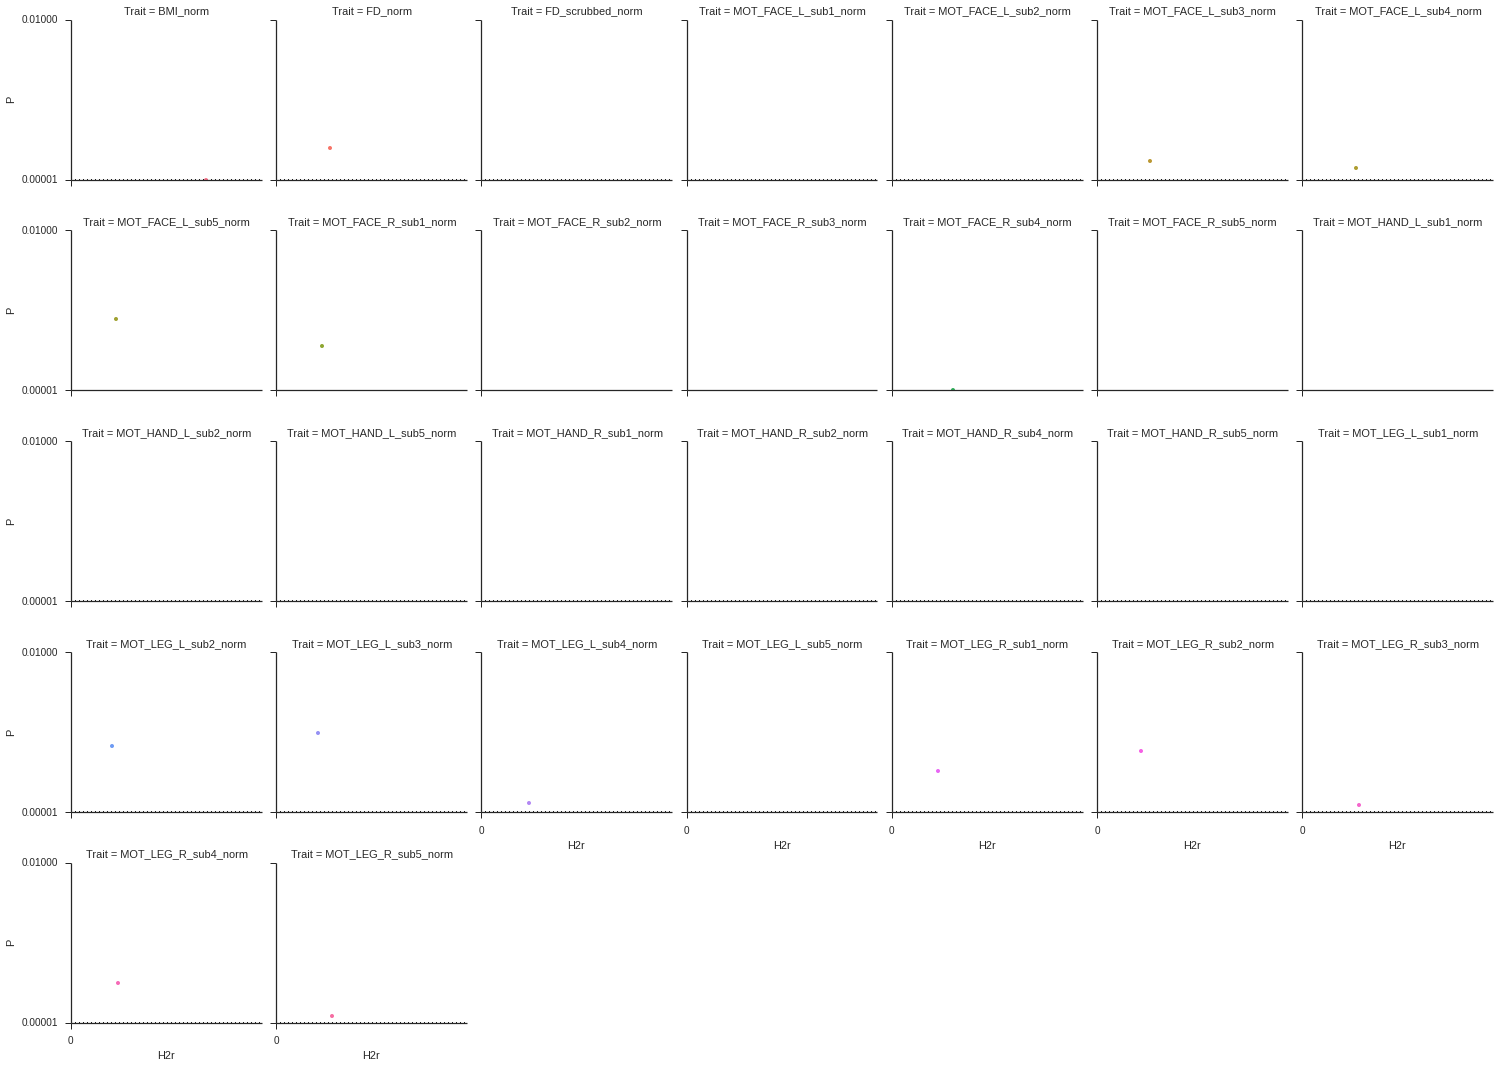

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(out_herit_df, col="Trait", hue="Trait", col_wrap=7, size=3)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".0005")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "H2r", "P", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[0.00001, 0.01],
         xlim=(0, 0.8), ylim=(0.00001, 0.01))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)